![Pandas logo](img/pandas.svg)

As in the prior lesson, much of this lesson is about *cleaning data*, which I have written about in more detail in [_Cleaning Data for Effective Data Science_](https://gnosis.cx/cleaning), ISBN-13 978-1801071291, 2021. I'd love it if you want to buy a copy, but you can read it freely online as well.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.training import *

# Sorting

It is often useful to look at DataFrames or Series in a particular order.  

On local disk we have an example of just one day worth of the NOAA temperature data that we utilize in various lessons.  Let us read it in then subset parts of interest.  This is still 1191 rows of data, covering each station observed that day.

In [2]:
df = pd.read_parquet('data/NOAA-Jan1.parquet')
df

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,...,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,1001099999,2019-01-01,70.933333,-8.666667,9.00,...,,0.00,G,999.9,1000
1,1001499999,2019-01-01,59.791925,5.340850,48.76,...,*,99.99,,999.9,10000
2,1002099999,2019-01-01,80.050000,16.250000,8.00,...,,0.00,I,999.9,0
3,1003099999,2019-01-01,77.000000,15.500000,12.00,...,*,0.00,G,999.9,0
4,1006099999,2019-01-01,78.250000,22.816667,14.00,...,,0.00,I,999.9,0
...,...,...,...,...,...,...,...,...,...,...,...
1248,6797099999,2019-01-01,46.416667,10.016667,2260.22,...,,0.00,G,999.9,0
1249,6798099999,2019-01-01,46.800000,10.283333,1295.00,...,,0.02,G,999.9,0
1250,6799099999,2019-01-01,46.816667,10.266667,2400.00,...,*,0.00,I,999.9,0
1251,6806599999,2019-01-01,46.966667,8.400000,450.00,...,*,0.00,I,999.9,0


In [3]:
df.set_index('NAME', inplace=True)
temps = df[['TEMP', 'LATITUDE', 'ELEVATION', 'PRCP', 'PRCP_ATTRIBUTES']]

In [4]:
# Show the first 20 rows in on-disk (random-ish) order
temps.head(20)

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"JAN MAYEN NOR NAVY, NO",24.0,70.933333,9.00,0.00,G
"SORSTOKKEN, NO",39.7,59.791925,48.76,99.99,
"VERLEGENHUKEN, NO",-0.1,80.050000,8.00,0.00,I
"HORNSUND, NO",3.9,77.000000,12.00,0.00,G
"EDGEOYA, NO",5.2,78.250000,14.00,0.00,I
...,...,...,...,...,...
"TROMSO, NO",26.6,69.683333,9.44,0.00,G
"TROMSO, NO",26.1,69.650000,114.50,0.02,G
"TROMSO HOLT, NO",27.5,69.650000,20.00,0.04,E


Discussion of plots and visualization is presented in other lessons, but a nice example where order is likely to be relevant is in plotting data.  Given the random-ish order of the data, we do not see any pattern, but simply different values.

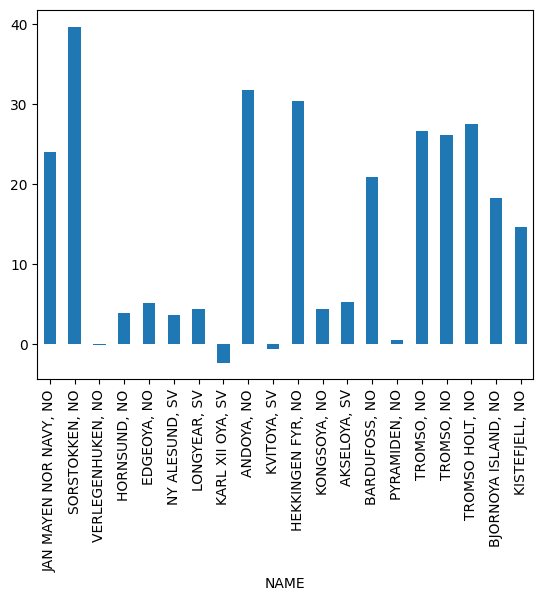

In [5]:
# We might visualize this data, but it is mostly just a list
temps.head(20).TEMP.plot(kind='bar');

## Sort by Index

Sometimes we would like to order by the index.  In this case, where the index is simply station names, this is probably of less significance.  Scanning by alphabetical order is certainly easier than random order, but we do not expect any particular trend or pattern in the place names.

In [6]:
# Order by the index
temps.sort_index().head(10)

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"A12 CPP HELIPAD OIL PLATFORM, NL",45.9,55.416667,33.00,99.99,
"AADORF TAENIKON, SZ",38.0,47.483333,539.53,0.05,G
"AALESUND, NO",40.5,62.466667,50.00,1.53,G
"AARHUS SYD, DA",42.2,56.083333,55.00,0.02,G
"AARHUS, DA",44.2,56.300017,24.99,0.03,G
"AARS SYD, DA",42.2,56.750000,33.00,0.04,G
"AARSLEV, DA",42.6,55.316667,51.00,0.05,G
"AASIAAT EGEDESMINDE, GL",21.9,68.700000,41.00,0.02,G
"AASIAAT MITTARFIA, GL",22.6,68.717000,27.00,99.99,


## Sort by Column

Often the field we would like to order by is one of the columns, perhaps to identify patterns in how other columns behave as one field increases/decreases.

In [7]:
# Order by temperature (coldest first)
temps.sort_values('TEMP').head()

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"FLAKKEBJERG, DA",-39.7,55.316667,34.0,0.02,G
"SUMMIT, GL",-30.6,72.583333,3207.0,0.00,I
"STATION NORD AWS, GL",-10.6,81.600000,36.0,0.00,I
"KAP MORRIS JESUP, GL",-7.1,83.650000,4.0,0.00,I
"DANMARKSHAVN PORT, GL",-6.4,76.766667,12.0,0.00,I


In [8]:
# Order by temperature (warmest first)
temps.sort_values('TEMP', ascending=False).head()

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"SCILLY SAINT MARY S, UK",49.7,49.916667,31.00,0.00,G
"GLOUCESTERSHIRE, UK",49.6,51.894167,30.78,0.00,I
"MACE HEAD, EI",49.4,53.316667,23.00,0.00,H
"VALENTIA OBSERVATORY, EI",49.3,51.933333,30.00,0.00,F
"EXETER, UK",49.3,50.734444,31.08,99.99,


### Combine sorting and analysis

Once ordered, a more interesting pattern might emerge.

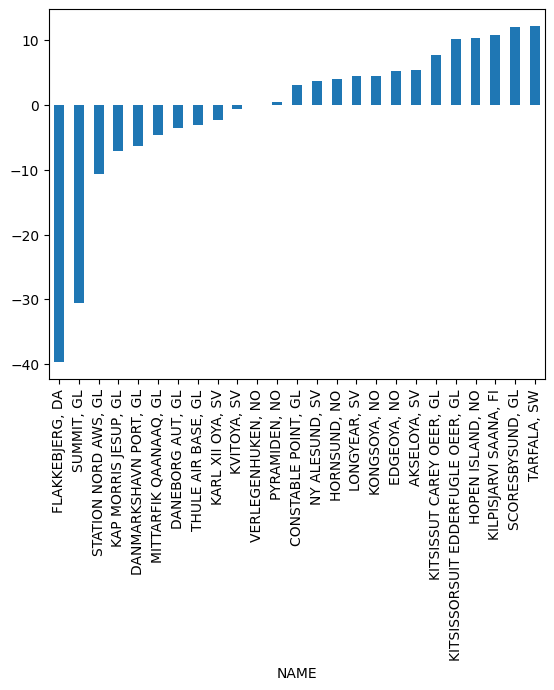

In [9]:
# Order by temperature (coldest first)
temps.sort_values('TEMP').TEMP.head(25).plot(kind='bar');

### Sort one feature, analyze another

In fact, we need not order by the same feature we visualize or analyze.  For example, what is the pattern of temperature on January 1, ordered from highest point to lower elevations?

In [10]:
temps.sort_values('LATITUDE', ascending=False).head(15)

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"KAP MORRIS JESUP, GL",-7.1,83.650000,4.0,0.0,I
"STATION NORD AWS, GL",-10.6,81.600000,36.0,0.0,I
"KARL XII OYA, SV",-2.3,80.650000,5.0,0.0,I
"KVITOYA, SV",-0.6,80.066667,10.0,0.0,I
"VERLEGENHUKEN, NO",-0.1,80.050000,8.0,0.0,I
...,...,...,...,...,...
"AKSELOYA, SV",5.3,77.683333,6.0,0.0,I
"MITTARFIK QAANAAQ, GL",-4.6,77.483333,16.0,0.0,I
"HORNSUND, NO",3.9,77.000000,12.0,0.0,G


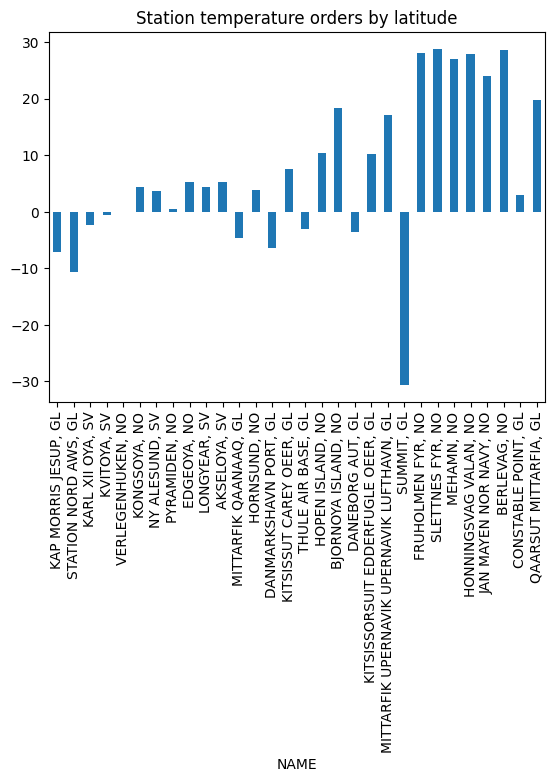

In [11]:
# Start to use Pandas "fluent style" for chained operations
(temps
     .sort_values('LATITUDE', ascending=False)
     .TEMP
     .head(30)
     .plot(kind='bar', title="Station temperature orders by latitude")
);

Just looking at the names of stations, even if they are ordered in a meaningful way, may not best reveal a general pattern among features.  We might first set the index to one feature, sort on index, then visualize or analyze another featuere so ordered.

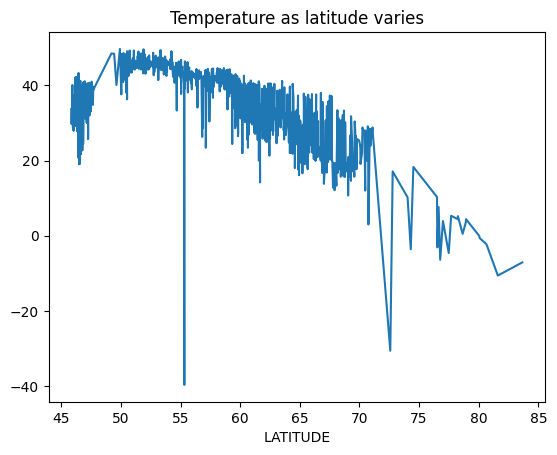

In [12]:
# No need to limit to small number of points if using line plot
(temps
     .set_index('LATITUDE')
     .sort_index()
     .TEMP
     .plot(title="Temperature as latitude varies")
);

We see a general pattern of temperatures tending to be higher at lower latitudes, which is generally what we would expect.  We can also see that only a few stations are above about 70° N by the fact the lines are less crowded.

Something odd seems to be happening around 55° latitude that we could take a closer look at.  For example, perhaps elevation is having a significant effect here.

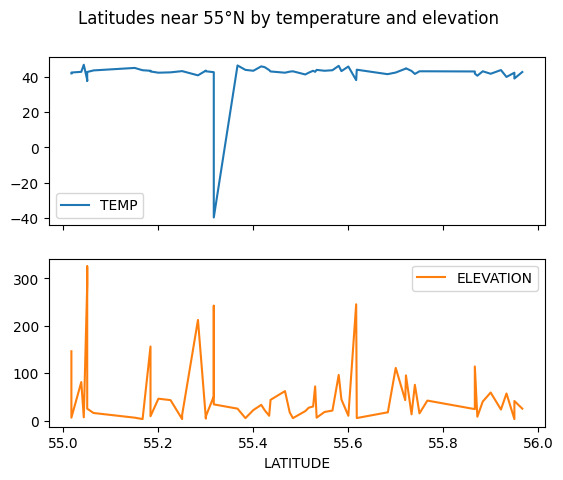

In [13]:
(temps
     .loc[(temps.LATITUDE > 55) & (temps.LATITUDE < 56)]
     .set_index('LATITUDE')
     .sort_index()
     [['TEMP', 'ELEVATION']]
     .plot(subplots=True, 
           title="Latitudes near 55°N by temperature and elevation")
);

In this particular case, no clear pattern for the oddly cold temperature at one station is evident.  We could explore further, or it may be a data anomoly.

## Sort by Multiple Columns

We can provide secondary or tertiary sort criteria when that is relevant, as well.

To make the data more manageable, let us select a smaller DataFrame of latitudes near 55° that we looked at above.

In [14]:
temps55 = temps.loc[(temps.LATITUDE > 55) & (temps.LATITUDE < 56)].copy()
temps55

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"FALSTERBO A, SW",43.9,55.383333,5.00,0.00,I
"HORBY, SW",41.8,55.866667,114.00,0.21,G
"SKILLINGE, SW",43.1,55.483333,5.00,0.04,G
"UTKLIPPAN, SW",42.3,55.950000,3.00,0.00,I
"MALMO, SW",43.7,55.566667,21.00,0.15,G
...,...,...,...,...,...
"SJAELSMARK, DA",43.1,55.883333,40.00,0.04,G
"BORNHOLM RONNE, DA",43.6,55.063267,15.84,99.99,
"HAMMER ODDE FYR, DA",43.1,55.300000,9.00,0.02,G


In this dataset we have a feature called `PRCP_ATTRIBUTES` which is a letter code describing the kind of precipitation.  We could consult NOAA better to understand the meanings of those codes, but for this purpose just note that there are a small number of them.

In [15]:
temps.PRCP_ATTRIBUTES.unique()

array(['G', ' ', 'I', 'E', 'F', 'B', 'A', 'H'], dtype=object)

Moreover, we would like to bin the different precipitation amounts into coarser increments just to make the secondary sort more evident.

In [16]:
temps55 = temps.loc[(temps.LATITUDE > 55) & (temps.LATITUDE < 56)].copy()
temps55['PRCP'] = temps55.PRCP.round(1)
temps55.sort_values(['PRCP', 'PRCP_ATTRIBUTES'], 
                    ascending=[False, True],
                    inplace=True)
temps55

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"STURUP, SW",42.8,55.530193,71.93,100.0,
"KRISTIANSTAD, SW",43.8,55.921686,23.16,100.0,
"GLASGOW, UK",40.6,55.871944,7.92,100.0,
"SPADEADAM, UK",37.7,55.050000,325.00,100.0,
"BOULMER, UK",45.4,55.424167,21.33,100.0,
...,...,...,...,...,...
"BLAAVANDSHUK, DA",43.4,55.550000,18.00,0.0,I
"VESTER VEDSTED, DA",43.5,55.300000,4.00,0.0,I
"KOLDING VAMDRUP, DA",43.0,55.436283,43.58,0.0,I


Unfortunately, this dataset was representing "Unknown values" as 99.99 (here rounded to 100).  So we need to ignore those placeholder values to see the meaningful part of it.

In [17]:
temps55[temps55.PRCP < 99].head(10)

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"HORBY, SW",41.8,55.866667,114.00,0.2,G
"MALMO, SW",43.7,55.566667,21.00,0.2,G
"MALIN HEAD, EI",46.4,55.366667,25.00,0.1,E
"ISLAY PORT ELLEN, UK",41.5,55.683333,17.00,0.1,G
"BALLYPATRICK FOREST, UK",43.4,55.183333,156.00,0.1,G
"ROESNAES, DA",43.1,55.750000,15.00,0.1,G
"ROSKILDE, DA",43.2,55.585567,44.50,0.1,G
"KASTRUP, DA",44.0,55.617917,5.18,0.1,G
"BRANDELEV, DA",42.3,55.200000,46.00,0.0,F


# More with Indices

The index of a Pandas DataFrame is, in a sense, just another column.  But a number of operations are much easier by utilizing an index column rather than a "regular" column.  As we have seen in prior modules, it is not difficult to move a column in or out of the index position using `.set_index()` or `.reset_index()`.

## Index alignment

Pandas performs a bit of useful magic wherein operations on several DataFrames or Series match up the rows with the corresponding index labels.  This happens regardless of the underlying order of the DataFrames, and is based on index equality not on position.

Let us look at some moderately old data files with Olympic medal counts.

In [18]:
bronze = pd.read_csv('data/Bronze.csv', index_col='Country')[['Total']]
silver = pd.read_csv('data/Silver.csv', index_col='Country')[['Total']]
gold = pd.read_csv('data/Gold.csv', index_col=1)[['Total']]

In [19]:
bronze.sort_values('Total', ascending=False)

,Total
Country,
United States,1052.0
Soviet Union,584.0
United Kingdom,505.0
France,475.0
Germany,454.0
...,...
Senegal,NaN
Sudan,NaN
Tonga,NaN


We would like to find out the total number of medals won by each nation from these several DataFrames.  At first pass, we could use *index alignment* to achive this. 

In [20]:
total = (gold + silver + bronze).sort_values('Total', ascending=False)
total.head()

,Total
Country,
United States,4335.0
Soviet Union,2049.0
United Kingdom,1594.0
France,1314.0
Italy,1228.0


So far, so good.  We could manually verify, but these top few totals are correct.  However, looking more closely, we find a problem.

In [21]:
total.loc[['Senegal', 'Sudan', 'Kyrgyzstan']]

,Total
Country,
Senegal,NaN
Sudan,NaN
Kyrgyzstan,NaN


In [22]:
bronze.loc[['Senegal', 'Sudan', 'Kyrgyzstan']]

,Total
Country,
Senegal,NaN
Sudan,NaN
Kyrgyzstan,2.0


In [23]:
silver.loc[['Senegal', 'Sudan', 'Kyrgyzstan']]

,Total
Country,
Senegal,1.0
Sudan,1.0
Kyrgyzstan,1.0


### Missing values

Unfortunately for our goal, the dataset encodes the absence of medals as a `NaN` ("Not a Number").  This is a special floating point value, and is the reason that the column is not integers, which may seem more natural.  

Often in observations, some data is not available. We saw the temperature data used the placeholder value 99.99 to represent unknown precipitation.  However, there are obvious problems with that encoding: what if some location got 99.99 inches of actual rain?  

NOAA simply decided that that particular value will never occur (nor will anything more than an order-of-magnitude less).  With domain knowledge, there might be such values that are outside reasonable ranges, but they will be specific to the feature being measured.  For example, measuring precipitation in millimeters rather than inches would make 99.99 a reasonable and possible value.  

An additional problem with encoding missing data with placeholder values is that aggregations can go badly wrong.  For example:

In [24]:
# What is the average precipiation across all the stations?
temps.PRCP.mean()

18.4928295549958

This conclusion is absurd.  Not only is 18.5 inches of rain not average, it is on the high side even for tropical cyclones.  Our placeholder is causing problems.  

Note that a different placeholder like -1 that was per-se numerically nonsensical would cause a similar problem, with the "average" perhaps winding up negative.

Using NaN is a more general approach.

In [25]:
# We can use None for a missing value, Pandas stores NaN internally
temps.loc[temps.PRCP > 99, 'PRCP'] = None
temps.head()

,TEMP,LATITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES
NAME,,,,,
"JAN MAYEN NOR NAVY, NO",24.0,70.933333,9.00,0.0,G
"SORSTOKKEN, NO",39.7,59.791925,48.76,NaN,
"VERLEGENHUKEN, NO",-0.1,80.050000,8.00,0.0,I
"HORNSUND, NO",3.9,77.000000,12.00,0.0,G
"EDGEOYA, NO",5.2,78.250000,14.00,0.0,I


In [26]:
temps.PRCP.mean()

0.1308127572016461

### Returning to medal count

While for a count of medals, zero is probably an excellent way of recording "No medals won," for other data fields, zero might instead simply be an actual measurement.  However, we can take our domain knowledge and impute zeros for this calulation.

In [27]:
total = (
    (gold.fillna(0) + silver.fillna(0) + bronze.fillna(0))
    .sort_values('Total', ascending=False)
    .astype(int))
total

,Total
Country,
United States,4335
Soviet Union,2049
United Kingdom,1594
France,1314
Italy,1228
...,...
Eritrea,1
Djibouti,1
Bermuda*,1


In [28]:
total.loc[['Senegal', 'Sudan', 'Kyrgyzstan']]

,Total
Country,
Senegal,1
Sudan,1
Kyrgyzstan,3


In [29]:
gold.loc[['Senegal', 'Sudan', 'Kyrgyzstan']]

,Total
Country,
Senegal,NaN
Sudan,NaN
Kyrgyzstan,NaN


# Exercises



Let us read in the moderately large NOAA temperature dataset we worked with before.  Our naïve manner of reading it simply allows Pandas to guess types.  For the most part that works well, but there is a date field we want to go back and adjust.

In [30]:
url = ("https://bitbucket.org/davidmertz/sample-data/raw/"
       "61872271984f66e3094c367cf90dfc4875a22e8d/NOAA-2019-partial.csv.gz")
temperatures = pd.read_csv(url)
temperatures['DATE'] = pd.to_datetime(temperatures.DATE, format="%Y-%m-%d")
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425641 entries, 0 to 425640
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   STATION           425641 non-null  int64         
 1   DATE              425641 non-null  datetime64[ns]
 2   LATITUDE          425641 non-null  float64       
 3   LONGITUDE         425641 non-null  float64       
 4   ELEVATION         425641 non-null  float64       
 5   NAME              425641 non-null  object        
 6   TEMP              425641 non-null  float64       
 7   TEMP_ATTRIBUTES   425641 non-null  int64         
 8   DEWP              425641 non-null  float64       
 9   DEWP_ATTRIBUTES   425641 non-null  int64         
 10  SLP               425641 non-null  float64       
 11  SLP_ATTRIBUTES    425641 non-null  int64         
 12  STP               425641 non-null  float64       
 13  STP_ATTRIBUTES    425641 non-null  int64         
 14  VISI

## Detecting Bad Data

Using the techniques in this lesson, as well as others you have learned, spend a while identifying all the questionable values in this large dataset.  The problem is deliberately open-ended, and a complete solution could take a long time.

For example, we have seen that precipitation uses a placeholder value.  In your cleanup, replacing placeholders with NaNs is a good improvement.  Often questionable values will fall at the `.head()` or the `.tail()` of the large DataFrame once you sort appropriately.

In the below we see that there are many 0.00 precipitation amounts, that are probably genuine measures.  There are a large number if placeholder values of 99.99.  Then there are some number of non-zero precipitation amounts.  Try to quantify that further. 

In [ ]:
# Look at start of sorted data, start, middle, jump from end, end
nrows = len(temperatures)
(temperatures
     .sort_values('PRCP')
     .iloc[[0, nrows//2, -70_000, -1]]
     .loc[:, ['NAME', 'DATE', 'TEMP', 'PRCP']]
     .set_index('NAME')
)

In [ ]:
# Identify placeholders
...

## Outliers

Of course, sometimes unusual measurements occur and reflect unusual events.  But bad data is also common in large datasets (even in small datasets).  Try to identify questionable measurements that are not actually placeholder values.

For example, in our analysis in this module, we found that one temperature measurement on January 1 was dramatically lower than other values at the same 55° latitude.  This is far enough off to be likely to be a data error of some kind.

In [ ]:
print("Number of measurements:", len(temps55))
print("Lowest temperature (F):", temps55.TEMP.min())
print("Highest temperature:   ", temps55.TEMP.max())
print("Mean temp Jan 1:       ", temps55.TEMP.mean())

Try to identify similarly questionable data among the other 425k rows, or simply to verify whether this datum is actually an error (e.g. we did not explain it by a high elevation, but perhaps there is another reason we missed). 

In [ ]:
# Identify outliers
...

*Suggestion*: data that differs by 3 standard deviations from "similar data" is likely to be an error.  For example, if a measurement one day, at one station, is dramatically different from the days nearby at same station, something is suspicious.  Or likewise, if data is very uncharacteristic of its month, latitude, and/or elevation, that could be a data error.

Of course, there really *are* hot days and cold days at the same place. And windy days and gentle days. And rainy days and clear days.  That is why the dataset exists to start with.  This exercise requires judgement.

## Merging Subsets

We have seen techniques to subset DataFrames, as well as to perform reductions.  Using those techniques, create a report on the following.  For each of the 1100 stations, what was the difference between the average January temperature and the average February temperature?

*Note:* In later modules we will explore other ways to answer this question and similar ones.  You have sufficient tools now to do it already though.

In [ ]:
# Identify tendencies between January and February
...

If you have extra time, formulate similar answer for other time period comparisons and other measured features.